In [45]:
import torch
import matplotlib.pyplot as plt
#head files for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [46]:
loaded_reward_dict = torch.load('/home/noahfang/Documents/Lab/AIRL_with_progress/replayed_traj/disc_cal_reward_memo.pt')
loaded_reward_dict = {k: v for k, v in loaded_reward_dict.items() if v}

In [47]:
# 计算每个键的总reward
total_rewards_per_key = {key: sum(rewards) for key, rewards in loaded_reward_dict.items()}

In [48]:
# read trajectories from folder bags

nop = 40
trajectories = []
progresses = []
steps = []
scalars = []
ind = []

for i in range(nop):
    traj = []
    step = []
    progress = []
    scalar = []
    
    pose_path = "/home/noahfang/Documents//Lab/LfD_with_porgress-master/bags/user_"+str(i)+"/0_poses.txt"
    step_path = "/home/noahfang/Documents//Lab/LfD_with_porgress-master/bags/user_"+str(i)+"/0_step.txt"
    progress_path = "/home/noahfang/Documents//Lab/LfD_with_porgress-master/bags/user_"+str(i)+"/0_progress.txt"
    scalar_path = "/home/noahfang/Documents//Lab/LfD_with_porgress-master/bags/user_"+str(i)+"/0_scalar.txt"
    if not os.path.exists(pose_path) or not os.path.exists(step_path) or not os.path.exists(progress_path) or not os.path.exists(scalar_path):
        continue
    ind.append(i)
    with open(pose_path, 'r') as file:
        for line in file:
            x, y, z = map(float, line.strip().split())
            traj.append([x, y, z])
    trajectories.append(traj)

    with open(step_path, 'r') as file:
        for line in file:
            step.append(int(line.strip()))
    steps.append(step)

    with open(progress_path, 'r') as file:
        for line in file:
            progress.append(int(line.strip()))
    progresses.append(progress)

    with open(scalar_path, 'r') as file:
        for line in file:
            scalar.append(int(line.strip()))
    scalars.append(scalar)

    
print(len(trajectories))
print(len(progresses))
print(len(steps))
print(len(scalars))
print(ind)

34
34
34
34
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38]


In [49]:
cumulative_rewards = {}
for key in ind:
    # 计算每个size/10的reward总和
    total_length = len(loaded_reward_dict[key]) # 计算reward总长度
    size = total_length // 10  # 计算每个区间的大小
    cumulative_rewards[key] = [0] * 10  # 初始化累计奖励列表
    # 计算该key的总reward
    total_reward = total_rewards_per_key[key]
    # 累计计算每个区间的reward总和
    for i in range(10):
        interval_sum = 0
        # 对于每个键，计算该区间内的reward总和
        interval_sum += sum(loaded_reward_dict[key][i*size:(i+1)*size])
        cumulative_rewards[key][i] = interval_sum if i == 0 else cumulative_rewards[key][i-1] + interval_sum
    # 设置图形的横纵坐标值
    intervals = [(i+1) for i in range(10)]
    cumulative_rewards[key] = [cumulative_rewards[key][i] for i in range(10)]


In [50]:
cumulative_rewards = {key: [(value - min(cumulative_rewards[key])) / (max(cumulative_rewards[key]) - min(cumulative_rewards[key])) * 100 for value in cumulative_rewards[key]] for key in cumulative_rewards}


In [52]:
print(cumulative_rewards)

{3: [tensor([0.]), tensor([10.8770]), tensor([22.2027]), tensor([33.9478]), tensor([45.2972]), tensor([56.7129]), tensor([67.9574]), tensor([78.7254]), tensor([89.7292]), tensor([100.])], 4: [tensor([0.]), tensor([11.1140]), tensor([22.3645]), tensor([33.5037]), tensor([44.4054]), tensor([55.7698]), tensor([67.0598]), tensor([78.2265]), tensor([89.0615]), tensor([100.])], 5: [tensor([0.]), tensor([10.9735]), tensor([21.7832]), tensor([32.8773]), tensor([44.4606]), tensor([56.1479]), tensor([67.3616]), tensor([78.5699]), tensor([89.3844]), tensor([100.])], 6: [tensor([0.]), tensor([11.1641]), tensor([22.0404]), tensor([32.9036]), tensor([44.1692]), tensor([55.2562]), tensor([66.4989]), tensor([77.6016]), tensor([88.8804]), tensor([100.])], 7: [tensor([0.]), tensor([11.4913]), tensor([23.0942]), tensor([34.0749]), tensor([44.9437]), tensor([55.8686]), tensor([66.6954]), tensor([78.1484]), tensor([89.3988]), tensor([100.])], 8: [tensor([0.]), tensor([11.3171]), tensor([22.8910]), tensor([

/opt/ros/noetic/lib/python3/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

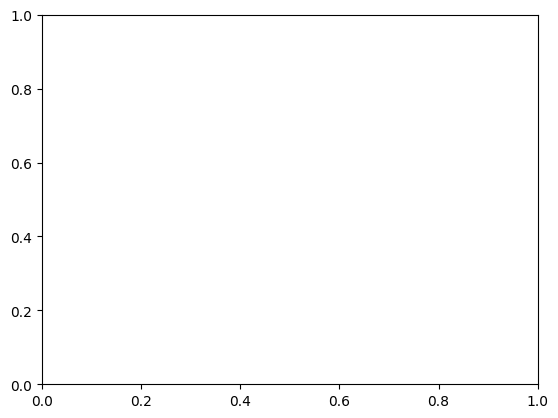

In [51]:
for i, item in enumerate(cumulative_rewards.values()):
    intervals = [(i+1) for i in range(10)]
    plt.plot(intervals, item, marker='o', label='Cumulative Rewards')  
    plt.plot(intervals, progresses[i], marker='o', label='Progress')  
    plt.plot(intervals, scalars[i], marker='o', label='Scalars')  
    plt.title('Cumulative Reward per Interval')
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./fig/disc_calculated_reward_ppo/user_{i}.png')
    plt.show()